## Simulating from the Null

Consider the same example as earlier, where we asked if the mean height for all coffee drinkers was greater thn 70 inches. We could again set up our null and alternative hypotheses like this.

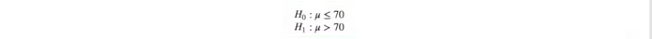

A second approach that is commonly done for making decisions in hypothesis testing is the following.

We assume that the null is true and we know that what the sampling distribution would look like if we were to simulate from the closest value under the null to the alternative i.e. the value of 70. That's the closest value under null hypothesis to our alternative hypothesis.

We could use the standard deviation of the sampling distribution to determine what the sampling distribution would look like if it came from the null hypothesis. We'll simulate from a normal distribution in this case.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

In [2]:
sample_df = df.sample(150)
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())

In [3]:
np.std(means)

0.2658039514418037

So the standard deviation of our sampling distribution is equal to 0.2658. And we know that it came from the null hypothesized value of 70 what it would look like. By the Central Limit Theorem, we know that it would follow a normal distribution. Now from the Numpy documentation on normal distributions https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html, we see we can simulate draws from the normal using the hypothesized mean at 70 and the standard deviation of our sampling distribution in the following way.

In [4]:
null_vals = np.random.normal(70, np.std(means), 10000)

(array([  10.,   75.,  505., 1570., 2882., 2849., 1567.,  447.,   89.,
           6.]),
 array([68.95628683, 69.16544433, 69.37460182, 69.58375932, 69.79291682,
        70.00207431, 70.21123181, 70.42038931, 70.6295468 , 70.8387043 ,
        71.04786179]),
 <a list of 10 Patch objects>)

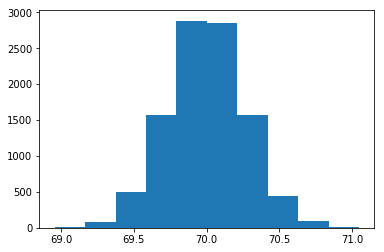

In [5]:
plt.hist(null_vals)

Each of the simulated draws here represents a possible mean from the null hypothesis. We can now ask the question of where the sample mean falls in this distribution.

In [6]:
sample_df.height.mean()

67.63297688228066

If we go back and look at what our sample mean was, we can see that it falls far below this distribution from the norm. If our sample mean was to fall closer to the center value of 70, it would be a value that we would expect from null hypothesis and therefore, we think the null is more likely to be true. In this case, with our sample means so far out in the tail, it's far enough that we don't think it probably came from this null hypothesized value.